In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as scipy
import scipy.integrate as sint
import math
import time
from IPython.display import display, Math, Latex

# PHYS 381 Final Report
Gisu Ham 10134838

## Introduction

In this notebook, I explore some behaviors of the trajectory of Jupiter as seen in the Earth's reference frame.  

First, I make two assumptions:  
1. Assume that the Earth completes a circular orbit (with radius of 1 AU) around the sun in exactly 365.25 days.  
2. Assume that Jupiter has a circular orbit with 5.2 AU radius, 12 year orbital period, and that the most recent closest approach to the Earth was on September 21 2010.  

Then I answer the following questions in order  

Question 1: Calculate and plot the distance $r(t)$ and angular location $\theta(t)$ of Jupiter as observed from Earth during 2000 to 2012.

Question 2: Determine the time(s) during this interval when Jupiter appeared to be stationary.

Question 3: Find the largest and smallest apparent angular speeds during each year.
See: https://en.wikipedia.org/wiki/Apparent_retrograde_motion

Question 4: Evaluate the following integrals

 $$ \int \cos(\omega t) \, \theta(t) \, dt $$
 $$ \int \sin(\omega t) \, \theta(t) \, dt $$

for the first 6 harmonics of the 12 year period (ie. T=12, 6, 3, 1.5, 1 years, 6 months, 4 months, 3 months, 2 months, 1 month)


Question 5: Fit a model to $\theta(t)$ and write a corresponding function to predict $\hat\theta(t)$ as a function of time.
There is more than one way of solving this problem.

See: https://www.youtube.com/watch?v=QVuU2YCwHjw

https://santi75.files.wordpress.com/2008/07/deferentes-epiciclos-y-adaptaciones.pdf

You must submit a single Jupyter notebook in ipynb format by midnight on Friday April 14. This should contain at least the following elements

 *Answers to each each question with some combintation of text, code, and figures or tables
 
 *An introduction and conclusions
 
 *Documented code with docstrings for all functions

## Question 1
Question 1: Calculate and plot the distance $r(t)$ and angular location $\theta(t)$ of Jupiter as observed from Earth during 2000 to 2012.

Consider the angular locations of the Earth $\theta_E(t)$ as a function of time t and the angular location of the Jupiter $\theta_J$ in the Sun's reference:

$$\theta_{E}(t)=w_Et+\phi_E$$
$$\theta_{J}(t)=w_Jt+\phi_J$$

where $w_E$ and $w_J$ are angular velocities of the Earth and Jupiter and $\phi_E$ and $\phi_J$ are the phases of Earth and Jupiter respectively. Now I aim to find the two phases. I approach this problem analytically rather than computationally.

Jupiter and Earth are at the closest distance only when they are aligned along a completely radial vector that has its origin at the center of the sun. Therefore at the time corresponding to 2010 September 21, which I call $t_c$, The two angular locations are equal:

$$\theta_1(t_c)=\theta_2(t_c)$$

So
$$w_Et_c+\phi_E=w_Jt_c+\phi_J$$

In both classical and quantum physics, absolute phase hold little physical significance, but rather its the phase difference that is useful. So without loss of generality, I choose the absolute phase such that the Earth has a phase of

$$\phi_E=0$$

Then simple algebra shows that

$$\phi_J=(w_E-w_J)t_c$$

Then $t_c$ can be easily computed

$$t_c=2010 + \frac{31+28+31+30+31+30+31+31+30+21}{365.25}\text{ years}$$ 

$$t_c=2010.80 \text{ years}$$ 

because angular speed $w$ is defined as 
$$w:=\frac{2\pi}{T}$$

where $T$ is the time it takes for a one complete cycle (period).  
Then since

$$w_E=2\pi \text{ radian/year}$$ 
$$w_J=\frac{2\pi}{12} \text{ radian/year}$$

I get
$$
\begin{align}
\phi_J&=\left(2\pi-\frac{2\pi}{12}\right)*2010.80\\
&=11581.4 \text{ radian}\\
&\equiv 1.46608 \text{ radian}
\end{align}
$$





Now I find distance to Jupiter $r(t)$ and angular location of the Jupiter $\theta(t)$ in the Earth's reference frame.

These two functions below return the caetesian coordinate trajectroy of Earth and Jupiter in the Sun's reference frame

In [2]:
def earth_orbit(year,phi_earth):
    """ return cartesian x,y coordinates of Earth orbit in the sun's reference frame
    """
    r, w, phi = 1.0, 2*np.pi*1.0, phi_earth
    arg = w*year + phi
    x, y = r*np.cos(arg), r*np.sin(arg)  
    return x,y

In [3]:
def jupiter_orbit(year,phi_jupiter):
    """ return cartesian x,y coordinates of Jupiter orbit in sun's reference frame
    """
    #radius, angular speed, phase
    r, w, phi = 5.2, 2*np.pi/12.0, phi_jupiter
    arg = w*year + phi
    x, y = r*np.cos(arg), r*np.sin(arg)  
    return x,y

Then trajectories are obtained using time domain of 2000-2012 years with intervals of minutes. Then I switch the reference frame to the Earth and plot the trajectory of Jupiter.

In [4]:
#The time interval I use here is in terms is minutes.
year = np.linspace(2000, 2012, 12*365.25*24*60+1)
e1,e2 = earth_orbit(year,0)
j1,j2= jupiter_orbit(year,1.46608)

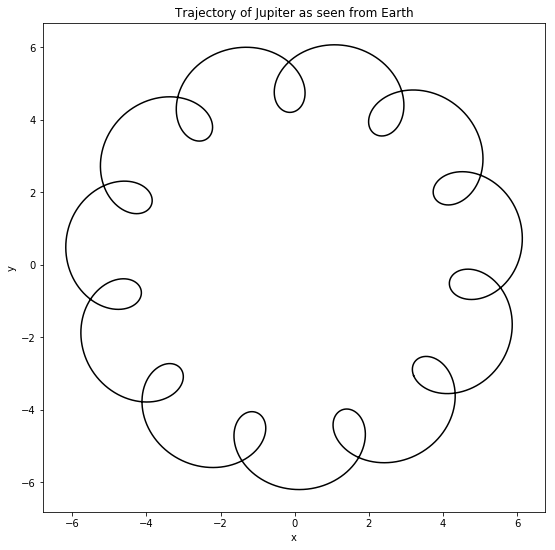

In [5]:
plt.figure(figsize=[9,9])
plt.title("Trajectory of Jupiter as seen from Earth")
plt.plot(j1-e1,j2-e2,'-',color='k',markersize=0.0135)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Then I want to plot $r(t)$ and $\theta(t)$ to study their behaviors.

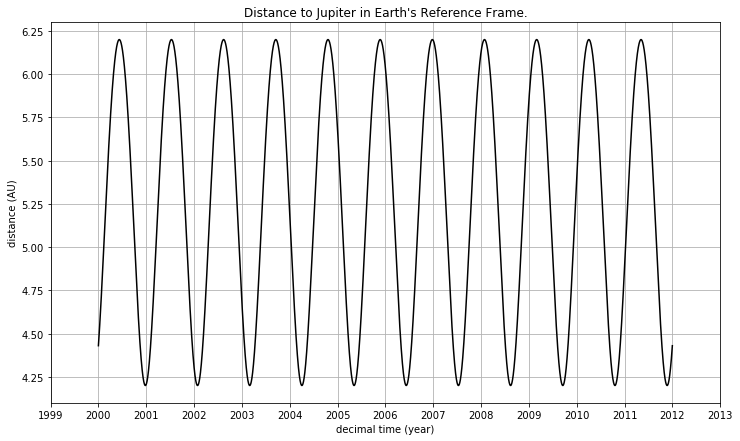

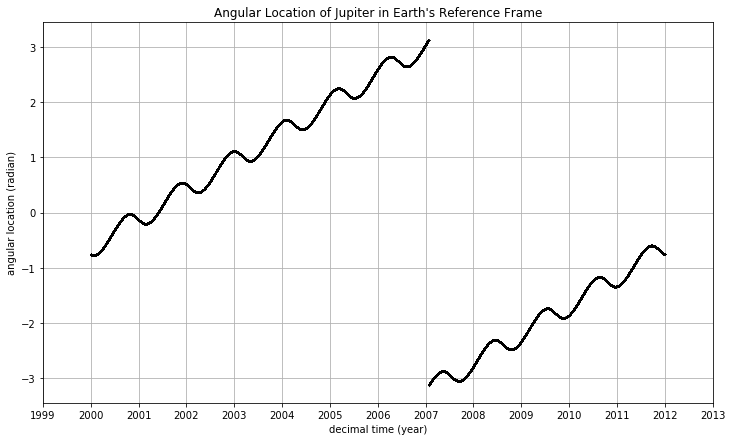

In [6]:
displacement=np.sqrt((j1-e1)**2+(j2-e2)**2)
"""This should really be named 'distance', but I found this error after I completed notebook 
and I used it couples of times already in later parts..
"""
ang = np.arctan2(  j2-e2, j1-e1 )

def convenience_func1(Zoom=False):
    """This function plots distance of jupiter in earth's frame.
    It's called convenience function because this function makes it easier to me to re-use
    these lines of codes later without having to copy and paste the whole thing"""
    plt.figure(figsize=[12,7])
    plt.title("Distance to Jupiter in Earth's Reference Frame.")
    plt.xlabel("decimal time (year)")
    plt.ylabel("distance (AU)")
    plt.plot(year,displacement,'-',color='k',markersize=0.0135)
    if Zoom==True:
        plt.xlim(2010.5,2011)
    ax=plt.subplot()
    ax.grid(True)
    if Zoom==False:
        plt.xticks(np.arange(1999,2014))
    plt.show()
    


def convenience_func2():
    """Plots angular location of jupiter in earth's frame.
    It's called convenience function because this function makes it easier to me to re-use
    these lines of codes later without having to copy and paste the whole thing
    """
    plt.figure(figsize=[12,7])
    plt.title("Angular Location of Jupiter in Earth's Reference Frame")
    plt.xlabel("decimal time (year)")
    plt.ylabel("angular location (radian)")
    plt.plot(year,ang,'ko',markersize=0.0135)
    ax=plt.subplot()
    ax.grid(True)
    plt.xticks(np.arange(1999,2014))
    plt.show()

convenience_func1()
convenience_func2()

Before I continue, I want to make sure that the closest distance does indeed occur on 2010 September 21.

Below is a plot of $r(t)$ near September 21.

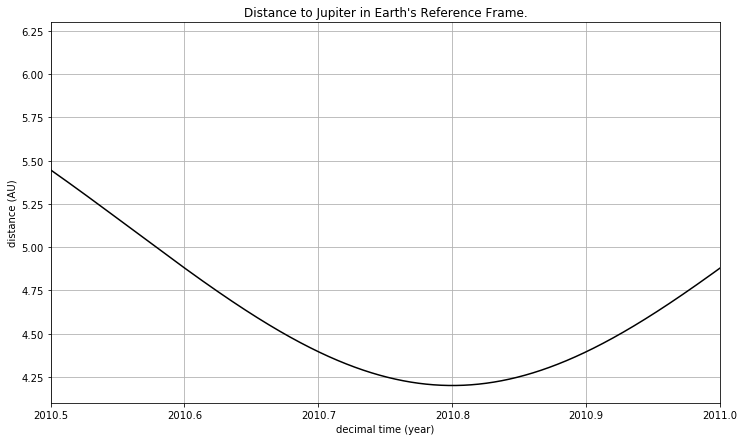

In [7]:
convenience_func1(Zoom=True)

Looks like it does have minimum near 2010.80 year, but pictures do not quality as proofs in general. Thus I examine it quantitatively.

In [8]:
#the range on displacement below approximately equal to 2010.5 and 2011
index_min_disp=np.argmin(displacement[5522580:5748729])+5522580 # find index of min between the range
print(year[index_min_disp]," year")

2010.8  year


Perfect

Note that in the 'Angular Location of Jupiter' plot above, the phase has wrapped itself in a bad spot. So I unwrap it using numpy.unwrap

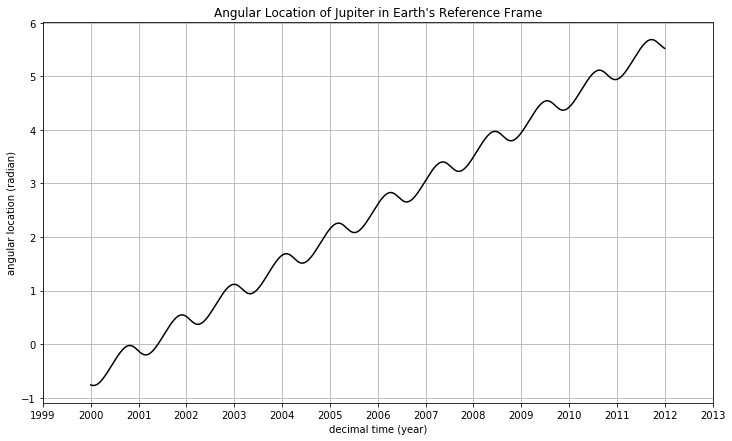

In [9]:
unwrap=np.unwrap(ang)
plt.figure(figsize=[12,7])
plt.title("Angular Location of Jupiter in Earth's Reference Frame")
plt.xlabel("decimal time (year)")
plt.ylabel("angular location (radian)")
plt.plot(year,unwrap,'-',color='k',markersize=0.0135)
ax=plt.subplot()
ax.grid(True)
plt.xticks(np.arange(1999,2014))
plt.show()


# Question 2

Question 2: Determine the time(s) during this interval when Jupiter appeared to be stationary.

The Jupiter can appear stationary in two different ways: Either it's distance isn't changing or it's angular location isn't changing.

Using the plot below, I claim that it's not possible for it to be stationary in both distance and angular location.

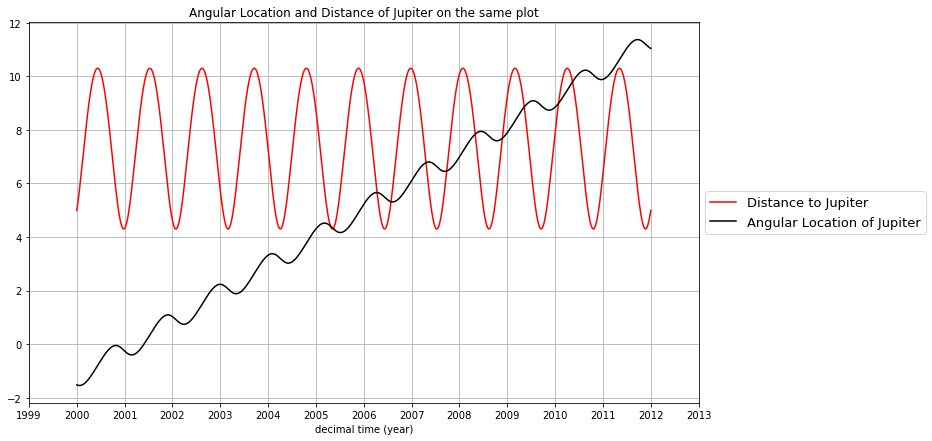

In [10]:
plt.figure(figsize=[12,7])
plt.title("Angular Location and Distance of Jupiter on the same plot")
plt.xlabel("decimal time (year)")
plt.plot(year,3*displacement-8.3,'-',color="r",markersize=0.0135,label="Distance to Jupiter")
plt.plot(year,2*unwrap,'-',color='k',markersize=0.0135,label="Angular Location of Jupiter")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)
ax=plt.subplot()
ax.grid(True)
plt.xticks(np.arange(1999,2014))
plt.show()


The ampliutes of both plots have been altered to contrast their maximas. Notice how they never have the maximas simultaneous in time. So I conclude the Jupiter is either stationary in distance or stationary in angular location, but not both.

First I find the time domains at which the angular location is stationary. Whenever the change in angular location is less than 0.00004 degree per minute, I define it as stationary.

Time domain at which the angular location of the Jupiter appears stationary
From                        To                                                          
2000.007236                 2000.106847                                                 
2000.765885                 2000.865494                                                 
2001.098144                 2001.197755                                                 
2001.856793                 2001.956404                                                 
2002.189054                 2002.288665                                                 
2002.947703                 2003.047312                                                 
2003.279964                 2003.379573                                                 
2004.038611                 2004.138222                                                 
2004.370872                 2004.470483                                                 
2005.129521                 2005.2

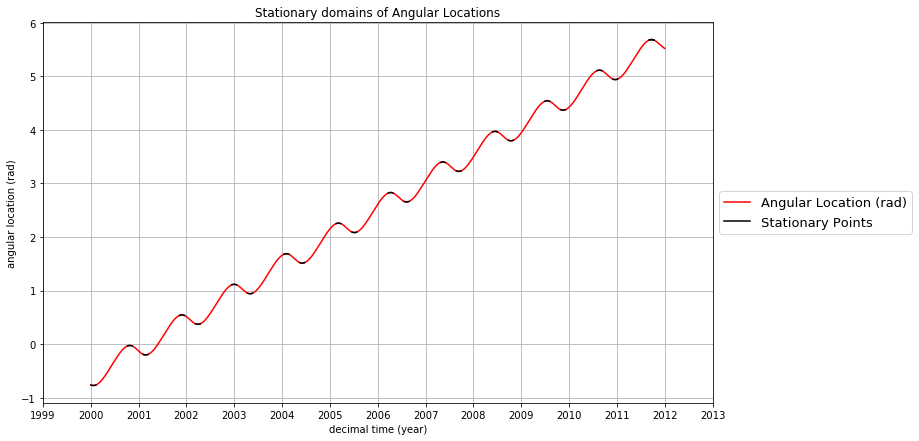

In [11]:
year = np.linspace(2000, 2012, 12*365.25*24*60+1)

stationary_points=[]# examine points that change less than 0.00001
stationary_points_range=[] # examine points and append the time domains into the stationary_domain
stationary_points_domain=[]  # final domain of stationary points

# append all points that change less than 0.00001 degree per min
for i in range(0,len(year)-1):
    if abs(unwrap[i+1]-unwrap[i])<0.00004*np.pi/180: # 0.00004 deg
        stationary_points.append([unwrap[i+1],unwrap[i],year[i+1],year[i]])
        
#here I simply find the interval of each stationary points
stationary_points_range.append([stationary_points[0][0],stationary_points[0][2]])
for i in range(0,len(stationary_points)-1):
    if abs(stationary_points[i+1][0]-stationary_points[i][0])>0.00005*np.pi/180:
        stationary_points_range.append([stationary_points[i][0],stationary_points[i][2]])
        stationary_points_range.append([stationary_points[i+1][0],stationary_points[i+1][2]])
stationary_points_range.append([stationary_points[-1][0],stationary_points[-1][2]]) # need to append the last element as the for loop above doesnt recognize it



for i in range(0,len(stationary_points_range),2):
    stationary_points_domain.append([stationary_points_range[i][1],stationary_points_range[i+1][1]])

plt.figure(figsize=[12,7])
plt.title("Stationary domains of Angular Locations")
N=3


plt.plot(year,unwrap,'-',color='red',markersize=0.01,label='Angular Location (rad)')
for i in range(0,len(stationary_points_domain)):
    low_index=np.where(year==stationary_points_domain[i][0])[0][0]
    upper_index=np.where(year==stationary_points_domain[i][1])[0][0]
    plt.plot(year[low_index:upper_index],unwrap[low_index:upper_index],'-',color='k')
plt.plot(year[low_index:upper_index],unwrap[low_index:upper_index],'-',color='k',label='Stationary Points')
plt.ylabel("angular location (rad)")
plt.xlabel("decimal time (year)")
spd=stationary_points_domain

print("Time domain at which the angular location of the Jupiter appears stationary")

print ('%-28s%-30s%-30s' % ('From','To',''))
for i in range(0,len(spd)):
    print ('%-28f%-30f%-30s' % (spd[i][0],spd[i][1],""))

    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)
ax=plt.subplot()
ax.grid(True)
plt.xticks(np.arange(1999,2014))
plt.show()


The validity of the domain is supported by the plot that shows that the stationary points are indeed near the maximas of the angular location.

Now I find the stationary points for the distance. If the distance does not change by 0.000002 AU per minute, I define it as stationary

Time domain at which the distance to Jupiter appears stationary
From                        To                                                          
2000.398378                 2000.474354                                                 
2000.956031                 2001.007609                                                 
2001.489286                 2001.565262                                                 
2002.046939                 2002.098517                                                 
2002.580196                 2002.656172                                                 
2003.137849                 2003.189427                                                 
2003.671104                 2003.747080                                                 
2004.228759                 2004.280335                                                 
2004.762014                 2004.837990                                                 
2005.319667                 2005.371245       

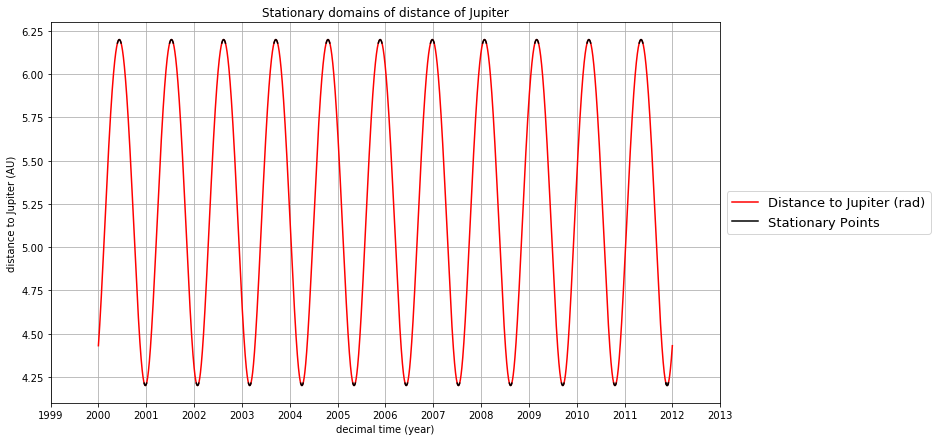

In [12]:
def convenience_func3(unwrap):
    """This function calculates and plots the distance stationary points of jupiter in earth's frame.
    Also plots the stationary points"""
    year = np.linspace(2000, 2012, 12*365.25*24*60+1)
    stationary_points=[]# examine points that change less than 0.00001
    stationary_points_range=[] # examine points and append the time domains into the stationary_domain
    stationary_points_domain=[]  # final domain of stationary points
    # append all points that change less than 0.00001 degree per min
    for i in range(0,len(year)-1):
        if abs(unwrap[i+1]-unwrap[i])<0.000002:
            stationary_points.append([unwrap[i+1],unwrap[i],year[i+1],year[i]])

    #here I simply find the interval of each stationary points
    stationary_points_range.append([stationary_points[0][0],stationary_points[0][2]])
    for i in range(0,len(stationary_points)-1):
        if abs(stationary_points[i+1][0]-stationary_points[i][0])>0.00001:
            stationary_points_range.append([stationary_points[i][0],stationary_points[i][2]])
            stationary_points_range.append([stationary_points[i+1][0],stationary_points[i+1][2]])
    stationary_points_range.append([stationary_points[-1][0],stationary_points[-1][2]]) # need to append the last element as the for loop above doesnt recognize it



    for i in range(0,len(stationary_points_range),2):
        stationary_points_domain.append([stationary_points_range[i][1],stationary_points_range[i+1][1]])

    plt.figure(figsize=[12,7])
    plt.title("Stationary domains of distance of Jupiter")
    N=3
    plt.plot(year,displacement,'-',color='red',markersize=0.01,label='Distance to Jupiter (rad)')
    for i in range(0,len(stationary_points_domain)):
        low_index=np.where(year==stationary_points_domain[i][0])[0][0]
        upper_index=np.where(year==stationary_points_domain[i][1])[0][0]
        plt.plot(year[low_index:upper_index],unwrap[low_index:upper_index],'-',color='k')
    plt.plot(year[low_index:upper_index],unwrap[low_index:upper_index],'-',color='k',label='Stationary Points')
    plt.ylabel("distance to Jupiter (AU)")
    plt.xlabel("decimal time (year)")

    spd=stationary_points_domain

    print("Time domain at which the distance to Jupiter appears stationary")

    print ('%-28s%-30s%-30s' % ('From','To',''))
    for i in range(0,len(spd)):
        print ('%-28f%-30f%-30s' % (spd[i][0],spd[i][1],""))
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)
    ax=plt.subplot()
    ax.grid(True)
    plt.xticks(np.arange(1999,2014))
    plt.show()
convenience_func3(displacement)

Again, the plot shows that the computed domains are indeed stationary points.

# Question 3

Question 3: Find the largest and smallest apparent angular speeds during each year.

First I plot the behavior of angular velocity and acceleration by taking the first and second derivatives.

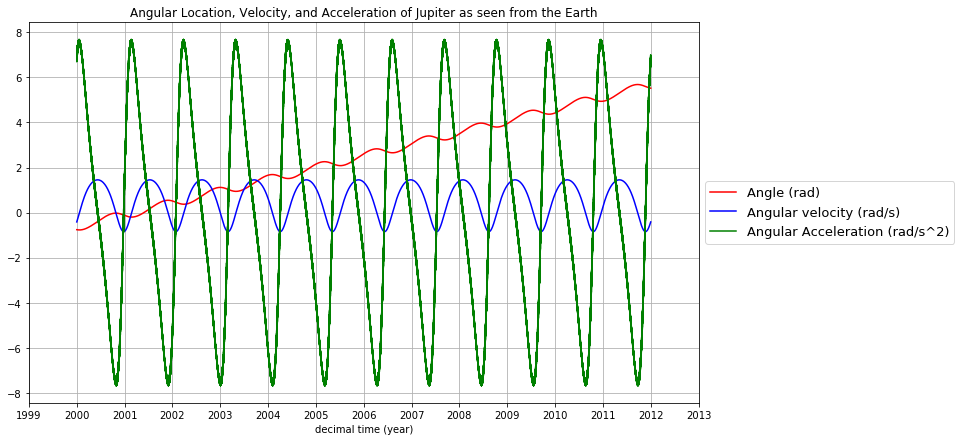

In [13]:
year = np.linspace(2000, 2012, 12*365.25*24*60+1)

dt = year[1]-year[0] #time domain
dy = np.diff(unwrap)/dt #first derivative
dydy=np.diff(dy)/dt #second derivative

#because each derivative reduce length of the list by 1, need to also reduce the length of year by 1 to plot.
dyear=[]
ddyear=[]
for i in range(0,len(year)-1):
    dyear.append(year[i])
for i in range(0,len(year)-2):
    ddyear.append(year[i])

    
    
ms=0.0135 #plot marker size
plt.figure(figsize=[12,7])
plt.title("Angular Location, Velocity, and Acceleration of Jupiter as seen from the Earth")
plt.plot(year,unwrap,'-',color='r',markersize=ms,label="Angle (rad)")
plt.plot(dyear,dy,'-',color='blue',markersize=ms,label="Angular velocity (rad/s)")
plt.plot(ddyear,dydy,'-',color='green',markersize=ms,label='Angular Acceleration (rad/s^2)')
plt.xlabel('decimal time (year)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)
ax=plt.subplot()
ax.grid(True)
plt.xticks(np.arange(1999,2014))
plt.show()



Plots appear to be consistent with the definitions of angular velocity (acceleration) as a rate of change of angular position (velocity) with respect to time. So I go ahead and find the maximum speed (velocity) and minimum speed (velocity) in each year.

Using the plot above, it's easy to predict that the maximum angular velocities and maximum angular speeds will coincide in time, so they can be found by simply finding maximum values for each year. However, because angular speed is a magnitude quantity, it must always be positive by definition. So minimum angular speeds would not coincide with the minimum angular velocities. So the problem of finding minimum angular speeds is essentially a root finding problem. Note this means there will be more than one minimum angular speeds for some year.

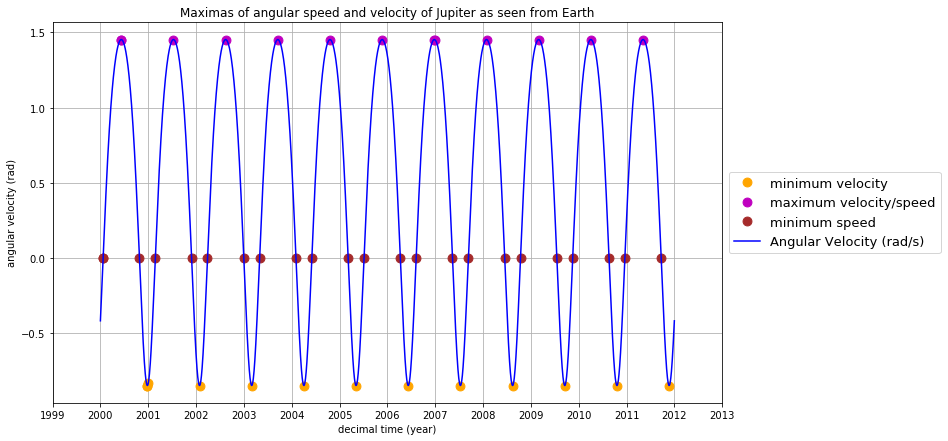

Maximum Speed and Minium Speed for Each Year

Year                min speed (rad/s)        min speed date (year)    max speed (rad/s)        max speed date (year)    
[2000 - 2001]       6.25631553801e-06        2000.05674006            1.45256457644            2000.43635638            
                    9.98271986741e-06        2000.81598601                                                              
[2001 - 2002]       1.27405984822e-05        2001.14765001            1.45256457612            2001.52728154            
                    3.36800820976e-06        2001.90689596                                                              
[2002 - 2003]       4.90728454412e-06        2002.23855807            1.45256457127            2002.61820671            
                    1.12882405607e-05        2002.99780402                                                              
[2003 - 2004]       1.1435041293e-05         2003.32946802            1.45256455673            2003.7090425

In [14]:
speed=np.abs(dy)
minv=[] # max velocity list
maxv=[] # min velocity list
mins=[] #min speed list
maxs=[] #max speed list
plt.figure(figsize=[12,7])
for i in range(2000,2012):
    #finding indxes of years 2000,2001 --- 2012
    low_index=np.where(year==i)[0][0]
    upper_index=np.where(year==i+1)[0][0]
    #finding indexes of min and max
    mini=np.argmin(dy[low_index:upper_index])+low_index
    maxi=np.argmax(dy[low_index:upper_index])+low_index
    #append stuff to lists for tabulation later
    minv.append([dy[mini],dyear[mini]])
    maxv.append([dy[maxi],dyear[maxi]])
    
for t in range(0,len(dy)):
    if dy[t]>0 and dy[t-1]<0:
        mins.append([dy[t],dyear[t]])
    elif dy[t]<0 and dy[t-1]>0:
        mins.append([dy[t-1],dyear[t-1]])

#plot
for i in range(0,len(minv)):
    plt.plot(minv[i][1],minv[i][0],'ko',color='orange',markersize=8.88)
for i in range(0,len(maxv)):
    plt.plot(maxv[i][1],maxv[i][0],'ko',color='m',markersize=8.88)
for i in range(0,len(mins)):
    plt.plot(mins[i][1],mins[i][0],'ko',color='brown',markersize=8.88)

plt.plot(minv[0][1],minv[0][0],'ko',color='orange',markersize=8.88,label='minimum velocity')
plt.plot(maxv[0][1],maxv[0][0],'ko',color='m',markersize=8.88,label='maximum velocity/speed')
plt.plot(mins[0][1],mins[0][0],'ko',color='brown',markersize=8.88,label='minimum speed')

ms=0.0135 #plot marker size
#plt.plot(year,unwrap,'-',color='r',markersize=ms,label="Angle (rad)")
plt.plot(dyear,dy,'-',color='blue',markersize=ms,label="Angular Velocity (rad/s)")
#plt.plot(ddyear,dydy,'-',color='green',markersize=ms,label='Angular Acceleration (rad/s^2)')
ax=plt.subplot()
ax.grid(True)
plt.xticks(np.arange(1999,2014))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)
ax=plt.subplot()
ax.grid(True)
plt.xticks(np.arange(1999,2014))
plt.ylabel("angular velocity (rad)")
plt.xlabel("decimal time (year)")
plt.title("Maximas of angular speed and velocity of Jupiter as seen from Earth")
plt.show()

yearlist=np.arange(2000,2013)
print("Maximum Speed and Minium Speed for Each Year")
print("")
print ('%-20s%-25s%-25s%-25s%-25s' % ('Year','min speed (rad/s)','min speed date (year)','max speed (rad/s)','max speed date (year)'))
j=0
for y in range(0,len(yearlist)):
    N=0
    for i in range(0,len(mins)):
        if mins[i][1]>=2000+y and mins[i][1]<=2000+y+1 and N==0:
            print ('%-20s%-25s%-25s%-25s%-25s' % ("["+str(yearlist[y])+" - "+str(yearlist[y+1])+"]",str(mins[i][0]),mins[i][1],maxv[j][0],maxv[j][1]))
            N=N+1
            j=j+1
    
        elif mins[i][1]>=2000+y and mins[i][1]<=2000+y+1 and N!=0:
            print ('%-20s%-25s%-25s%-25s%-25s' % ("",mins[i][0],mins[i][1],"",""))
            N=0

print("")
print("")
print("")
print("Maximum Velocity and Minimum Velocity for Each Year")
print("")
print ('%-20s%-25s%-28s%-25s%-25s' % ('Year','min velocity (rad/s)','min velocity date (year)','max velocity (rad/s)','max velocity date (year)'))
for i in range(0,len(minv)):
    print ('%-20s%-25s%-28s%-25s%-25s' % ("["+str(2000+i)+" - "+str(2000+i+1)+"]",minv[i][0],minv[i][1],maxv[i][0],maxv[i][1]))

The tabulated datas are pretty self-explanatory and there isn't much to comment on, other than the fact they they seem to be in agreement with the plot generated along with it.

# Question 4

Evaluate the following integrals

 $$ \int \cos(\omega t) \, \theta(t) \, dt $$
 $$ \int \sin(\omega t) \, \theta(t) \, dt $$

for the first 6 integer multiples of complete sinusoids (or cosinusoids) in a 12-year interval)  
eg. periods of T=1 year, 6 months, 4 months, 3 months, 2 months, 1 month.

For integration, I use scipy.integrate.simps

In [15]:
def H_gen(x,T):
    """This function generates the harmonic function sin(wt) and cos(wt) with input periods
    args= x,T,= period, time list"""
    
    return np.cos(2*np.pi*x/T),np.sin(2*np.pi*x/T)

Results of integrals. (aka. the Fourier Coefficients)

(sin or cos)                Period                        Fourier Coefficients          
cos                         144 month(s)                  -10.3923048454                
sin                         144 month(s)                  6.0                           

cos                         72 month(s)                   5.19615242271                 
sin                         72 month(s)                   3.0                           

cos                         36 month(s)                   -2.59807621135                
sin                         36 month(s)                   1.5                           

cos                         18.0 month(s)                 1.29903810568                 
sin                         18.0 month(s)                 0.75                          

cos                         12 month(s)                   -4.91495733002e-13            
sin                         12 month(s)            

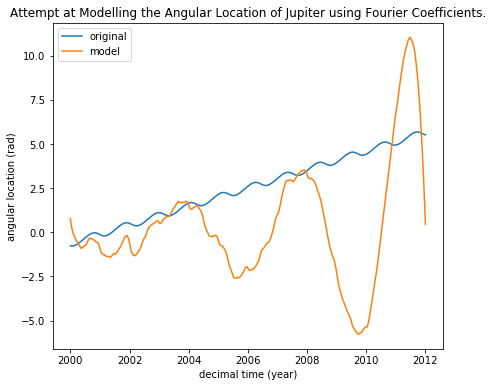

In [16]:
#Form now on, I wish to use time intervals of hours instead of minuets for computation time efficiency.
year = np.linspace(2000, 2012, 12*365.25*24+1)
e1,e2 = earth_orbit(year,0)
j1,j2= jupiter_orbit(year,1.46608)
displacement=np.sqrt((j1-e1)**2+(j2-e2)**2)
ang = np.arctan2(  j2-e2, j1-e1 )
unwrap=np.unwrap(ang)

def integrate_plot(T,year,theta,Plot_sin=True,Plot_prod=True):
    """This function performs integration of product of sinusoid and the angular location function 
    arguments: T,Year,theta,Plot_sin=True,Plot_prod=True = period, year, theta,plot sinusoid, plot products
    uses cumtrapz to plot the resulting plot of integral, while using scipy.simp  to get the value of integral"""
    theta=np.array(theta)
    prod_cos=H_gen(year,T)[0]*theta
    prod_sin=H_gen(year,T)[1]*theta

    if Plot_sin==True:
        plt.plot(year,prod_cos)
        plt.plot(year,prod_sin)
        plt.show()

    #integration section
    int_cos=sint.cumtrapz(prod_cos,year)
    int_sin=sint.cumtrapz(prod_sin,year)
    int_val_cos=sint.simps(prod_cos,year)
    int_val_sin=sint.simps(prod_sin,year)
    
    year=year.tolist()
    year.pop()
    if Plot_prod==True:
        plt.figure(figsize=[14.5,8])
        plt.plot(year,int_cos,label="cos")
        plt.plot(year,int_sin,label="sin")
        plt.xlabel("time (year)")
        plt.ylabel("product of angle with sinusoidal functions (rad)")
        plt.title("Plot of product of sinusoidal function of period "+str(int(T*12))+" month"+" and the angle")
        plt.legend()
        plt.show()
    
    return int_val_cos,int_val_sin
print("Results of integrals. (aka. the Fourier Coefficients)")
print("")
list1=np.zeros([1,len(year)])[0]
period_list=[12,6,3,1.5,1,6/12,4/12,3/12,2/12,1/12]
print ('%-28s%-30s%-30s' % ('(sin or cos)','Period','Fourier Coefficients'))
for i in period_list:
    a1,a2=integrate_plot(i,year,unwrap,Plot_sin=False,Plot_prod=False)
    print ('%-28s%-30s%-30s' % ('cos',str(i*12)+" month(s)",a1))
    print ('%-28s%-30s%-30s' % ('sin',str(i*12)+" month(s)",a2))
    print("")
    
list1=np.zeros([1,len(year)])[0]
for i in range(1,49):
    a1,a2=integrate_plot(i/12,year,unwrap,Plot_sin=False,Plot_prod=False)
    list1=list1+(a1*np.cos(2*np.pi*year/(i/12))/(2*np.pi))
    list1=list1+(a2*np.sin(2*np.pi*year/(i/12))/(2*np.pi))
    
plt.figure(figsize=[7,6])
plt.plot(year,unwrap,label="original")
plt.plot(year,list1,label='model')
plt.title("Attempt at Modelling the Angular Location of Jupiter using Fourier Coefficients.")
plt.ylabel("angular location (rad)")
plt.xlabel("decimal time (year)")
#plt.plot(year,unwrap-list1,label="dif")
plt.legend()
plt.show()


Presumably, the coefficient I found are the Fourier Coefficients that can be use to model the original (angular location of the Jupiter) when summed over along with sinusoidal functions. However, I was unsuccessful at modeling the original with the coefficients I found for unknown reasons. The plot above is the closest result I was able to produce. So it appears, for now, there is no way to make sure the coefficients are correct and accurate. I intent to come back to these results later after I modeled the original using pseudo-inverse method in question 5. After I model it, it would provide me with an analytical function representing the original. Then I can use different integration techniques to compute the integrals and contrast with the results above.


# Question 5

Question 5: Fit a model to $\theta(t)$ and write a corresponding function to predict $\hat\theta(t)$ as a function of time.

I can think of two ways to model $\theta(t)$:

1. Adding sufficiently large numbers of purely sinusoidal functions
$$f(t)=a_0+\sum_{n=1}^{N}[a_ncos\left(\frac{n2\pi t}{12}\right)+b_nsin\left(\frac{n2\pi t}{12}\right)]$$

2. Use hybrid function of linear and sinusoidal functions
$$f(t)=c_0+c_1t+a_0+\sum_{n=1}^{N}[a_ncos\left(\frac{n2\pi t}{12}\right)+b_nsin\left(\frac{n2\pi t}{12}\right)]$$

For both models, I use pseudo inverse method from assignment 7.

# Method 1: Purely sinusoidal functions

As explained above, I add sufficiently large numbers dinstinct cosine and sine terms (72 each) to model the angular location of the Jupiter. I will denote the angular location of Jupiter as 'original' for convenience.

In [17]:
def fit_fourier_pseudo(x,y,n):
    """Use Moore-Penrose pseudo inverse to fit Fourier Series to the data"""
    
    kern=np.zeros([len(x),2*n+1])
    kern[:,0]=1.0
    for coeff in range(1,2*n+1):
        if coeff%2==1:    # odd, then set kern's column as cos
            kern[:,coeff]=np.cos((coeff+1)/2*2*math.pi*x/12)
        elif coeff%2==0:    #even, then set kern's column as sin
            kern[:,coeff]=np.sin(coeff/2*2*math.pi*x/12)
        else:
            print("something is wrong")
        
    kTk =  np.dot(kern.T, kern)
    kerninv = np.linalg.inv( kTk )
    eigvals = np.linalg.eigvals(kerninv)
    
    model = np.dot( kerninv, np.dot(kern.T, y) )
    residuals = y - np.dot(kern, model)
    chi2 = np.sum( residuals**2 )
    
    return kern, kTk, kerninv, eigvals, model, chi2

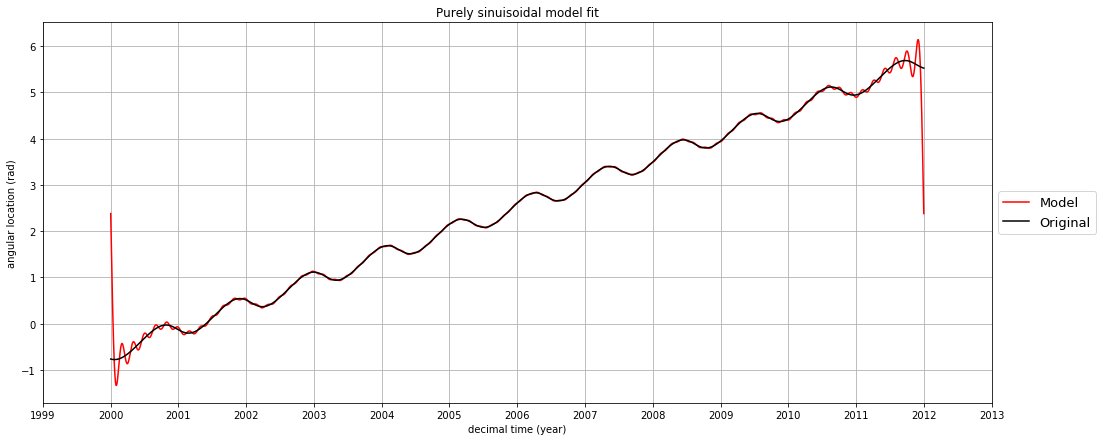

chi square:  2911.68002997
condition number:  2.00001903892
time taken:  27.763655185699463 seconds


In [18]:
def fit_fourier(year,theta_minus_linear,n):
    """Fit the Fourier series into the data
    argument: (n)={integer} denotes number of sin and cosine pairs produved in the function
    """
        
    returned=fit_fourier_pseudo(year,theta_minus_linear,n)
    
    model=returned[4]
    chi_square=returned[5]
    pos_eig=np.abs(np.array(returned[3]))
    condition_number=max(pos_eig)/min(pos_eig)
    
    fitted_data=[]
    for t in year:
        sum_var=model[0] # need to temporarily define variable to sum over the constant a_o as well as sinusoidals
        for i in range(1,len(model)):
            if i%2==1:    # odd
                sum_var+=model[i]*np.cos((i+1)/2*2*math.pi*t/12)
            elif i%2==0:    #even
                sum_var+=model[i]*np.sin(i/2*2*math.pi*t/12)
            else:
                print("something is wrong")
        fitted_data.append(sum_var)
    
    fitted_data=np.array(fitted_data)
    theta_minus_linear=np.array(theta_minus_linear)
    
    plt.figure(figsize=[17,7])
    plt.title("Purely sinuisoidal model fit")
    plt.plot(year,fitted_data,'-',color='r',label="Model")
    plt.plot(year,theta_minus_linear,'-',color='k',markersize=0.03,label="Original")
    plt.ylabel("angular location (rad)")
    plt.xlabel("decimal time (year)")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)
    ax=plt.subplot()
    ax.grid(True)
    plt.xticks(np.arange(1999,2014))
    plt.show()
    
    return chi_square,condition_number,fitted_data,model

start = time.time()

chi_square,condition_number,fitted_data,model=fit_fourier(year,unwrap,72)
print('chi square: ',chi_square)
print('condition number: ',condition_number)


end = time.time()
print("time taken: ",end - start,"seconds")

It's a decent model, but results near the end points are unsatisfactory. To improve it, I need to add more sin and cos waves, but that is out of the question because it may require infinite number of sine waves of different periods to perfectly mimic the behavior of such end points.

# Method 2: Hybrid of sinusoidal and linear polynomial

Similar to Method 1, I use pseudo inverse method. This time, I do the fitting in two steps, that is, first I do a linear fit to the original. Then I filter out the linear function from the original, leaving me with a purely sinusoidal function, to which I apply completely sinusoidal fit. Then at the end, I combine the linear fit and sinusoidal fit, which gives me the complete model of the original.


First I do a linear fit.

In [19]:
def fit_linear(x,y):
    """Use Moore-Penrose pseudo inverse to fit Fourier Series to the data"""
    
    kern=np.zeros([len(x),2])
    kern[:,0]=1.0
    kern[:,1]=x
    
        
    kTk =  np.dot(kern.T, kern)
    kerninv = np.linalg.inv( kTk )
    eigvals = np.linalg.eigvals(kerninv)
    
    model = np.dot( kerninv, np.dot(kern.T, y) )
    residuals = y - np.dot(kern, model)
    chi2 = np.sum( residuals**2 )
    
    return kern, kTk, kerninv, eigvals, model, chi2

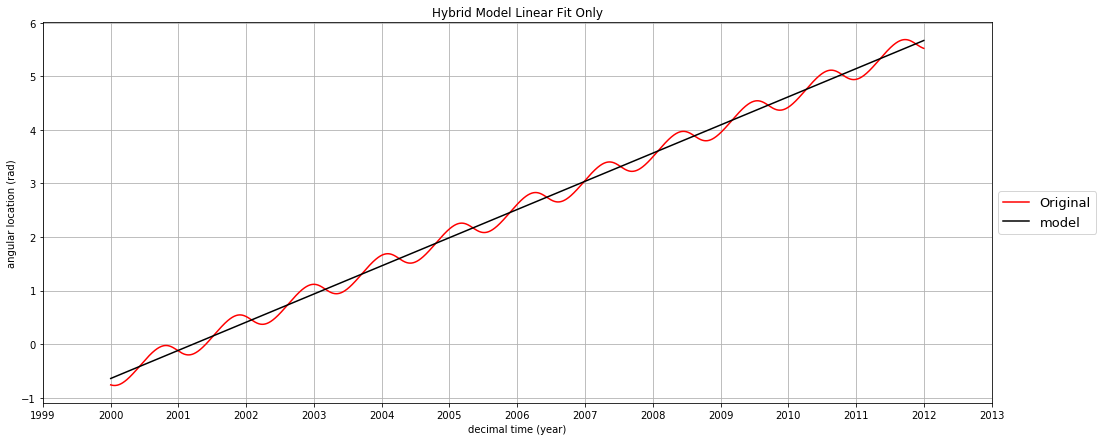

chi square:  1956.81563669
condition number:  1.34938854087e+12


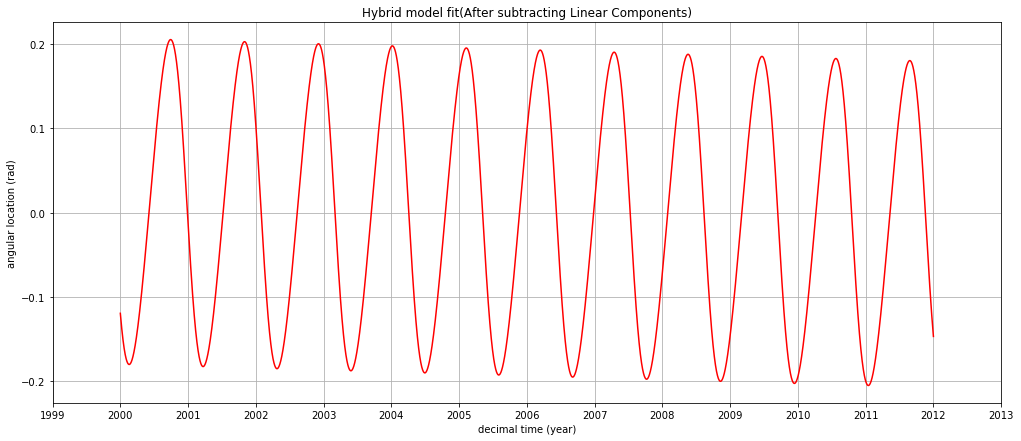

In [20]:
year = np.linspace(2000, 2012, 12*365.25*24+1)

def fit_linear_sinu(year,theta):
    """Fit the Fourier series into the data
    argument: (n)={integer} denotes number of sin and cosine pairs produved in the function
    """
    
    #all relevant retuned values from the fit
    returned=fit_linear(year,theta)
    model=returned[4]
    chi_square=returned[5]
    pos_eig=np.abs(np.array(returned[3]))
    condition_number=max(pos_eig)/min(pos_eig)
    
    #now build list using the model
    fitted_data=[]
    c=model[0]
    a0=model[1]
    
    for t in year:
        fitted_data.append(c+a0*t)
    
    fitted_data=np.array(fitted_data)
    theta=np.array(theta)
    
    
    plt.figure(figsize=[17,7])
    plt.title("Hybrid Model Linear Fit Only")
    plt.plot(year,theta,'-',color='r',markersize=0.05,label="Original")
    plt.plot(year,fitted_data,'-',color='k',markersize=0.05,label="model")
    plt.ylabel("angular location (rad)")
    plt.xlabel("decimal time (year)")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)
    ax=plt.subplot()
    ax.grid(True)
    plt.xticks(np.arange(1999,2014))
    plt.show()
    
    
    print('chi square: ',chi_square)
    print('condition number: ',condition_number)
    
    plt.figure(figsize=[17,7])
    plt.title("Hybrid model fit(After subtracting Linear Components)")
    plt.plot(year,theta-fitted_data,'-',color='r',markersize=0.05,label="model")
    plt.ylabel("angular location (rad)")
    plt.xlabel("decimal time (year)")
    ax=plt.subplot()
    ax.grid(True)
    plt.xticks(np.arange(1999,2014))
    plt.show()
    
    
    
    return chi_square,condition_number,fitted_data,theta-fitted_data,np.array([c,a0])

chi_square,condition_number,linear,theta_minus_linear,linear_model = fit_linear_sinu(year,unwrap)

First plot shows the model that represents the linear dependence (1st degree polynomial) of the original. The second plot is the result of subtracting that linear dependence from the original. For unknown reasons, it appears to slightly shifts down over time, so it may still have some linear dependence. It's not shown on this notebook, but I did try another linear fit to this shifting plot, but it did not alter the plot by significant margin. However, this shifting problem is not an issue because if I use sufficiently large numbers of distinct sin and cosine term, it should be able to capture this shifting behavior.

On a side note, this linear fit generated considerably high chi square and condition number. This was expected because linear fit was never meant to completely model the original, but rather simply determine its linear dependence. It should not pose any serious problem.

Now it's time to fit sinusoidal functions to the filtered out function.

In [21]:
def fit_fourier_pseudo(x,y,n):
    """Use Moore-Penrose pseudo inverse to fit Fourier Series to the data"""
    
    kern=np.zeros([len(x),2*n+1])
    kern[:,0]=1.0
    for coeff in range(1,2*n+1):
        if coeff%2==1:    # odd, then set kern's column as cos
            kern[:,coeff]=np.cos((coeff+1)/2*2*math.pi*x/12)
        elif coeff%2==0:    #even, then set kern's column as sin
            kern[:,coeff]=np.sin(coeff/2*2*math.pi*x/12)
        else:
            print("something is wrong")
        
    kTk =  np.dot(kern.T, kern)
    kerninv = np.linalg.inv( kTk )
    eigvals = np.linalg.eigvals(kerninv)
    
    model = np.dot( kerninv, np.dot(kern.T, y) )
    residuals = y - np.dot(kern, model)
    chi2 = np.sum( residuals**2 )
    
    return kern, kTk, kerninv, eigvals, model, chi2

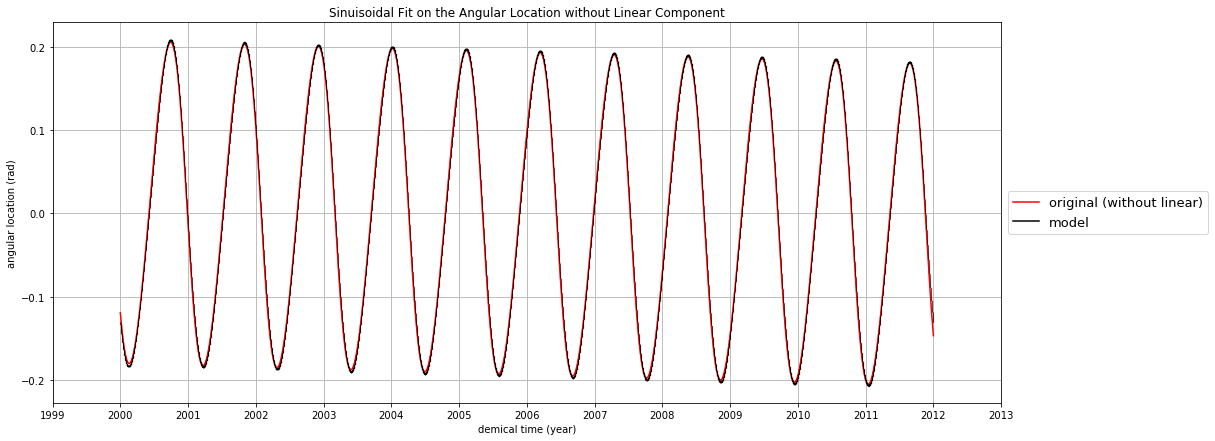

chi square:  0.493133968715
condition number:  2.00001902153


In [22]:
def fit_fourier(year,theta_minus_linear,n):
    """Fit the Fourier series into the data
    argument: (n)={integer} denotes number of sin and cosine pairs produved in the function
    """
        
    returned=fit_fourier_pseudo(year,theta_minus_linear,n)
    
    model=returned[4]
    chi_square=returned[5]
    pos_eig=np.abs(np.array(returned[3]))
    condition_number=max(pos_eig)/min(pos_eig)
    
    fitted_data=[]
    for t in year:
        sum_var=model[0] # need to temporarily define variable to sum over the constant a_o as well as sinusoidals
        for i in range(1,len(model)):
            if i%2==1:    # odd
                sum_var+=model[i]*np.cos((i+1)/2*2*math.pi*t/12)
            elif i%2==0:    #even2
                sum_var+=model[i]*np.sin(i/2*2*math.pi*t/12)
            else:
                print("something is wrong")
        fitted_data.append(sum_var)
    
    fitted_data=np.array(fitted_data)
    theta_minus_linear=np.array(theta_minus_linear)
    
    plt.figure(figsize=[17,7])
    plt.title("Sinuisoidal Fit on the Angular Location without Linear Component")
    plt.plot(year,theta_minus_linear,color='r',label="original (without linear)")
    plt.plot(year,fitted_data,'ko',color='k',markersize=0.03)
    plt.plot(year[0],fitted_data[0],'-',color='k',label="model")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)
    plt.xlabel("demical time (year)")
    plt.ylabel('angular location (rad)')
    ax=plt.subplot()
    ax.grid(True)
    plt.xticks(np.arange(1999,2014))
    plt.show()
    
    return chi_square,condition_number,fitted_data,model

chi_square,condition_number,fitted_data,sin_model=fit_fourier(year,theta_minus_linear,24)
print('chi square: ',chi_square)
print('condition number: ',condition_number)

Seems to be a satisfactory fit with reasonable chi square and condition number.

Now I combine both models to generate the complete model. Below, I created theta_vec function that should represent $\theta(t)$

In [23]:
def theta_vec(t,linear,sin):
    """This function is the theta(t) constructed by the models I obtained via fit
    args=t,linear,sin = time list, linear model, sinusoidal model"""
    func=linear[0]+linear[1]*t
    func+=sin[0]
    for i in range(1,len(sin)):
        if i%2==1:    # all cos on odd index
            func+=sin[i]*np.cos((i+1)/2*2*math.pi*t/12)
        elif i%2==0:    #all sin on even index
            func+=sin[i]*np.sin(i/2*2*math.pi*t/12)
        else:
            print("something is wrong")
    return func

And now the plot of the complete model

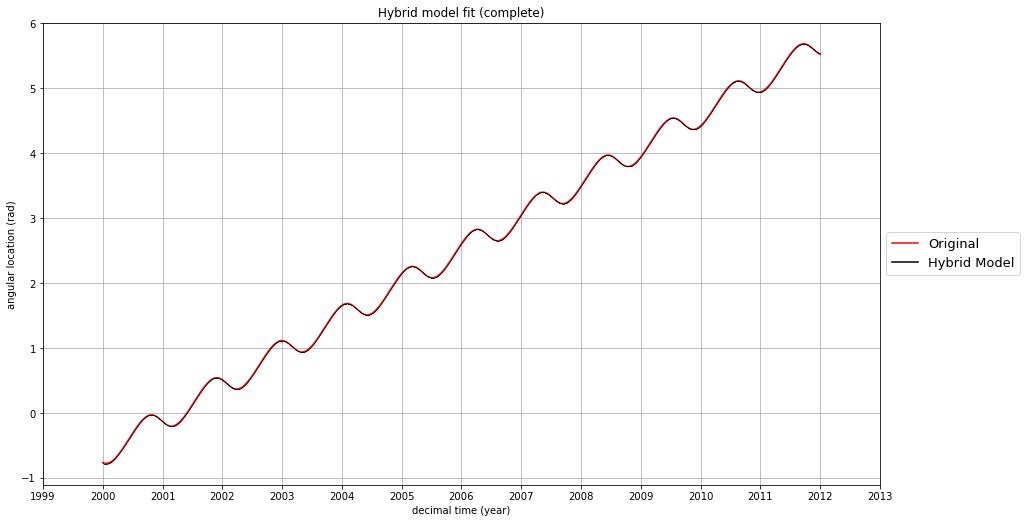

In [24]:
plt.figure(figsize=[15,8.5])
plt.plot(year,unwrap,'-',markersize=0.5,color='r',label="Original")
plt.plot(year,theta_vec(year,linear_model,sin_model),'ko',markersize=0.003,color='k')
plt.plot(year[0],theta_vec(year,linear_model,sin_model)[0],'-',markersize=0.003,color='k',label="Hybrid Model")
plt.title("Hybrid model fit (complete)")
plt.ylabel("angular location (rad)")
plt.xlabel("decimal time (year)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)
ax=plt.subplot()
ax.grid(True)
plt.xticks(np.arange(1999,2014))
plt.show()

This is ceraintly a huge improvement over Method 1. So without a doubt, theta_vec is a valid model for $\theta(t)$. Furthermore, I only added 24 distinct sine functions and 24 distinct cosine functions . The quality of fit can still be improved by adding more functions. The total chi square of method 2 (0.49+1956) has also improved compared method 1 (2911) under the assumption that the chi square of independent fits are additive.

As mentioned, the function I am using to fit is
$$\theta(t)=c_0+c_1t+a_0+\sum_{n=0}^{N}[a_ncos\left(\frac{n2\pi t}{12}\right)+b_nsin\left(\frac{n2\pi t}{12}\right)]$$

Then below is the list of values of each coefficients

In [25]:
sin=sin_model
linear=linear_model
print ('%-20s%-25s' % ("Coefficient","Value"))

print ('%-20s%-25s' % ("c_0",linear[0]))
print ('%-20s%-25s' % ("c_1",linear[1]))
print("")
print ('%-20s%-25s' % ("a_0",sin[0]))
for i in range(1,len(sin)):
    if i%2==1:    # all cos on odd index     "
        print ('%-20s%-25s' % ("a_"+str(int((i+1)/2)),sin[i]))
    elif i%2==0:    #all sin on even index
        print ('%-20s%-25s' % ("b_"+str(int(i/2)),sin[i]))
    else:
        print("something is wrong")

Coefficient         Value                    
c_0                 -1052.41480939           
c_1                 0.525886383685           

a_0                 1.24180315426e-06        
a_1                 0.00756736990785         
b_1                 -0.00436896931056        
a_2                 -0.00378365004358        
b_2                 -0.00218454511397        
a_3                 -4.65426234671e-08       
b_3                 0.00291267307151         
a_4                 0.00189185992201         
b_4                 -0.00109221209245        
a_5                 -0.0015134460452         
b_5                 -0.00087384222439        
a_6                 -4.65426233588e-08       
b_6                 0.00145633652406         
a_7                 0.00108107277539         
b_7                 -0.000624103915092       
a_8                 -0.000945895040537       
b_8                 -0.000546166499072       
a_9                 -4.65426220519e-08       
b_9                 0.00097089100

By definition,
$$\hat{\theta}(t)=-sin\theta(t)~\hat{x}+cos\theta(t)~\hat{y}$$

This allows me to compute $\hat{\theta}(t)$ for any $t$ since now I know the analytical form of $\theta(t)$

There are two things I would like to do to make sure my results are correct. Using $\theta(t)$, I want to show $\hat{\theta}(t)$ is really a unit vector on x-y plane. I also want to plot the trajectory of Jupiter using

$$x=r(t)cos(\theta(t))$$  
$$y=r(t)sin(\theta(t))$$

where $r(t)$ is just the distance function with respect to time I found earlier. Now I plot $\hat{\theta}(t)$ and trajectory of Jupiter over the time domain 2000~2012

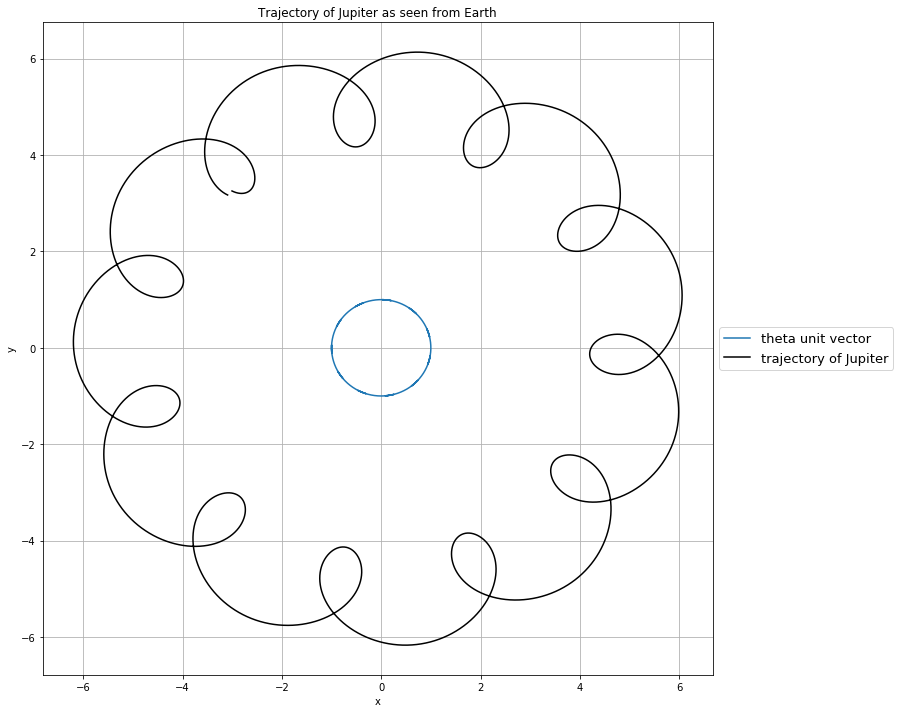

In [26]:
func=theta_vec(year,linear_model,sin_model)
plt.figure(figsize=[12,12])
plt.plot(-np.sin(func),np.cos(func),label="theta unit vector")
plt.plot(displacement*np.sin(func),displacement*np.cos(func),'-',color='k',markersize=0.05,label="trajectory of Jupiter")
plt.title('Trajectory of Jupiter as seen from Earth')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)
ax=plt.subplot()
ax.grid(True)
plt.show()

So $\hat{\theta}(t)$ really is a unit vector. This trajectory of Jupiter is exactly what I obtained at the very beginning of this notebook.
But there is a disconnected region on the top left, which appears to be a mere residue from the slight imperfection of the fit.

There remains just one more task for me to accomplish.

In question (4), I mentioned that I will come back to it after I have the analytical form $\theta(t)$. Here, I try to compute 
 $$ \int \cos(\omega t) \, \theta(t) \, dt $$
 $$ \int \sin(\omega t) \, \theta(t) \, dt $$
and compare to what I got in question (4)

Using the analytical form of $\theta(t)$ I find the integral using scipy.integrate.romberg.

In [27]:
def prod_sin(t,T,f,linear,sin):
    return np.sin(2*np.pi*t/T)*f(t,linear,sin)
def prod_cos(t,T,f,linear,sin):
    return np.cos(2*np.pi*t/T)*f(t,linear,sin)

In [28]:
list1=np.zeros([1,len(year)])[0]

period_list=[12,6,3,1.5,1,6/12,4/12,3/12,2/12,1/12]
print("Results of integral using analytical form of theta")
print ('%-20s%-30s%-30s' % ('(sin or cos)','Period','Fourier Coefficients'))
for i in period_list:
    a=sint.romberg(prod_cos,2000,2012, tol=1.48e-08,args=(i,theta_vec,linear_model,sin_model),divmax=20)
    b=sint.romberg(prod_sin,2000,2012, tol=1.48e-08,args=(i,theta_vec,linear_model,sin_model),divmax=20)
    list1=list1+(a*np.cos(2*np.pi*year/i))
    list1=list1+(b*np.cos(2*np.pi*year/i))
    #print("cos month:"+str(i*12)+"month(s)","  ",a)
    #print("sin month:"+str(i*12)+"month(s)","  ",b)
    print ('%-20s%-30s%-30s' % ('cos',str(i*12)+" month(s)",a))
    print ('%-20s%-30s%-30s' % ('sin',str(i*12)+" month(s)",b))
    print("")


Results of integral using analytical form of theta
(sin or cos)        Period                        Fourier Coefficients          
cos                 144 month(s)                  -10.3923047058                
sin                 144 month(s)                  6.00000024185                 

cos                 72 month(s)                   5.19615256236                 
sin                 72 month(s)                   2.99999975817                 

cos                 36 month(s)                   -2.59807607178                
sin                 36 month(s)                   1.50000024187                 

cos                 18.0 month(s)                 1.29903824541                 
sin                 18.0 month(s)                 0.749999758217                

cos                 12 month(s)                   -2.7925684348e-07             
sin                 12 month(s)                   -2.50864149687e-11            

cos                 6.0 month(s)                  -2.

Below is the copy and paste of the results in question (4)

In [29]:
period_list=[12,6,3,1.5,1,6/12,4/12,3/12,2/12,1/12]
print("Results of integral from question (4)")
print ('%-20s%-30s%-30s' % ('(sin or cos)','Period','Fourier Coefficients'))
for i in period_list:
    a1,a2=integrate_plot(i,year,unwrap,Plot_sin=False,Plot_prod=False)
    list1=list1+(a1*np.cos(2*np.pi*year/i))
    list1=list1+(a2*np.sin(2*np.pi*year/i))
    print ('%-20s%-30s%-30s' % ('cos',str(i*12)+" month(s)",a1))
    print ('%-20s%-30s%-30s' % ('sin',str(i*12)+" month(s)",a2))
    print("")

Results of integral from question (4)
(sin or cos)        Period                        Fourier Coefficients          
cos                 144 month(s)                  -10.3923048454                
sin                 144 month(s)                  6.0                           

cos                 72 month(s)                   5.19615242271                 
sin                 72 month(s)                   3.0                           

cos                 36 month(s)                   -2.59807621135                
sin                 36 month(s)                   1.5                           

cos                 18.0 month(s)                 1.29903810568                 
sin                 18.0 month(s)                 0.75                          

cos                 12 month(s)                   -4.91495733002e-13            
sin                 12 month(s)                   -1.0                          

cos                 6.0 month(s)                  -4.96047647403e-

For periods of <18 months, the values of coefficients are readily inconsistent. For now, I really have no idea why. But I conjecture that one of the sources of the problem is the lack of proper normalization that fourier coefficients require in general.

# Conclusion

I investigated some of Jupiter's behavior in the earth's reference frames for the year 2000-2012. For each year, I found interesting properties such as mininum and maximum speed as well as the stationary points at which the Jupiter appears to be stationary in either in distance or angular location. Then I fitted the angular location of Jupiter using hybrid function of sinusoidal and 1st degree polynomial. Finding the fourier coefficients of the angular location of Jupiter however, was unsuccessful because there were no consistencies between different integration attempts.